# YAPILACAK OLAN SENTİMENT ANALİZİN DEMOSU OLARAK PROJE YAPILDI

## Havayolu için Tweet

## Tweetler Havayolu performansları için duygu analizi verileri.

In [1]:
import pandas as pd
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv("Tweets.csv")

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [76]:
data["text"].isnull().sum()

0

## Yalnızca metin ve duygu sütununa ihtiyacımız var. O yüzden sadece o sütunları seçiyoruz

In [77]:
review_data= data[["text","airline_sentiment"]]

In [78]:
review_data.shape

(14640, 2)

In [79]:
review_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## Duyarlılık analizi veri kümesinde 14.000'den fazla veri örneği vardır.

In [80]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [81]:
len(data["airline_sentiment"])

14640

In [82]:
len(data["text"])

14640

In [83]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

## Düzenli ifade (Regular expression)
## Bilgisayarcılıkta düzenli ifadeler veya kurallı ifadeler, ele alınan metindeki kimi katarların kısa yoldan ve esnek bir biçimde belirlenmesini sağlar. Bu katarlar belli karakterler, kelimeler veya karakter örüntüleri olabilir

In [84]:
from textblob import TextBlob  

import re

def clean_tweet(tweet):
    '''
Bağlantıları ve özel karakterleri regex kullanarak kaldırarak bir tweet'teki metni temizlemek için yardımcı program işlevi.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z  \t])|(\w+:\/\/\S+)", " ", tweet).split())


for tweet in data:
        analysis = TextBlob(clean_tweet(tweet))
        pol = analysis.sentiment.polarity
        sub = analysis.subjectivity
        pol_round = '%.3f' % pol
        sub_round = '%.3f' % sub

### Bu ikili sınıflandırma problemi için veri setimizde gerçekten tarafsız incelemelere ihtiyacımız yok. Bu nedenle, bu satırları veri kümesinden bırakın.

In [85]:
review_data=review_data[review_data["airline_sentiment"] != "neutral"]

In [86]:
review_data.shape

(11541, 2)

In [87]:
review_data.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [88]:
review_data.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [89]:
data["airline_sentiment"].isnull().sum()

0

In [90]:
review_data["airline_sentiment"].describe()

count        11541
unique           2
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [91]:
review_data["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

### Bu veri kümesinin etiketleri kategoriktir. Makineler yalnızca sayısal verileri anlar. Bu nedenle, factorize() yöntemini kullanarak kategorik değerleri sayısala dönüştürün. Bu, bir sayısal değerler dizisi ve bir kategori Dizini döndürür.

In [92]:
sentiment_label=review_data.airline_sentiment.factorize()

In [93]:
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [94]:
len(sentiment_label) #0 - #1

2

##  0 olumlu duyguyu, 1 ise olumsuz duyguyu temsil eder.

### Metin verilerimizi makine öğrenimi modelimizin anlayacağı şekle dönüştürelim

In [95]:
tweet=review_data.text.values

In [96]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer

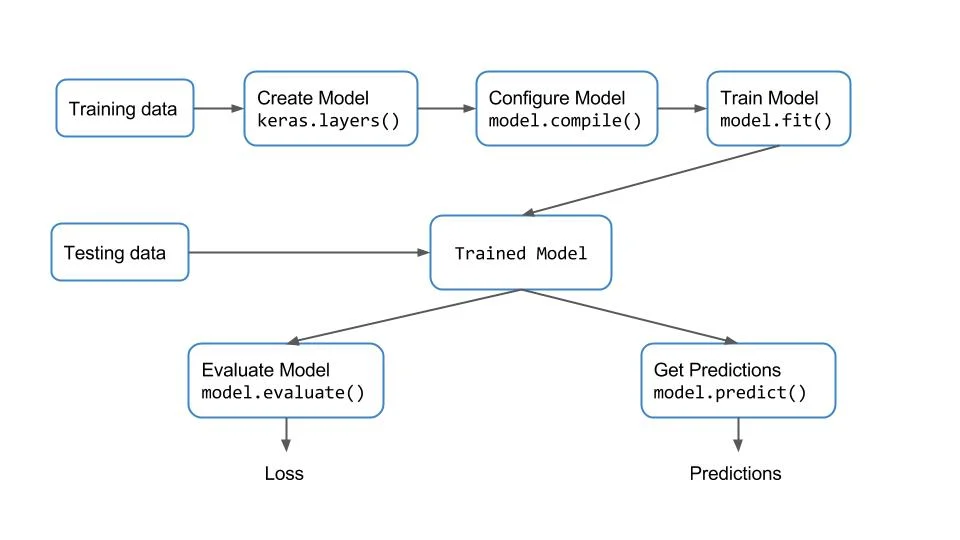

In [98]:
tokenizer=Tokenizer(num_words=5000)

In [99]:
tokenizer

In [100]:
tokenizer.fit_on_texts(tweet)

### fit_on_texts() yöntemi, kelimeler ve atanan sayılar arasında bir ilişki oluşturur. Bu ilişkilendirme, tokenizer.word_index özniteliğinde bir sözlük biçiminde saklanır.
### Şimdi, text_to_sequence() yöntemini kullanarak kelimeleri atanan sayılarla değiştirelim.

In [101]:
encoded_docs=tokenizer.texts_to_sequences(tweet)

In [102]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
padded_sequence=pad_sequences(encoded_docs,maxlen=200)

# Build The Classifier 

## Bırakma, düzenlileştirme tekniklerinden biridir. Fazla takılmayı önlemek için kullanılır.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Embedding

In [45]:
vocab_size=len(tokenizer.word_index)+1
embedding_vector_lenght=32

In [46]:
model=Sequential()

In [47]:
model.add(Embedding(vocab_size,embedding_vector_lenght,input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5)),
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [48]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

### Model özet tablosu, model ile bağımlı değişken arasındaki ilişkinin gücünü bildirir. Çoklu korelasyon katsayısı olan R, bağımlı değişkenin gözlemlenen ve model tarafından tahmin edilen değerleri arasındaki doğrusal korelasyondur. Büyük değeri güçlü bir ilişkiyi gösterir.

 # Duygu analizi modelini eğitin

In [50]:
history=model.fit(padded_sequence,sentiment_label[0],validation_split=0.2,epochs=5,batch_size=32)

Epoch 1/5
289/289 [==============================] - 34s 112ms/step - loss: 0.4032 - accuracy: 0.8332 - val_loss: 0.2025 - val_accuracy: 0.9220
Epoch 2/5
289/289 [==============================] - 32s 110ms/step - loss: 0.2192 - accuracy: 0.9135 - val_loss: 0.1630 - val_accuracy: 0.9402
Epoch 3/5
289/289 [==============================] - 32s 109ms/step - loss: 0.1631 - accuracy: 0.9392 - val_loss: 0.1601 - val_accuracy: 0.9450
Epoch 4/5
289/289 [==============================] - 32s 110ms/step - loss: 0.1311 - accuracy: 0.9493 - val_loss: 0.1689 - val_accuracy: 0.9450
Epoch 5/5
289/289 [==============================] - 32s 110ms/step - loss: 0.1073 - accuracy: 0.9601 - val_loss: 0.1922 - val_accuracy: 0.9433


## Değer Doğruluğu => 0.9433

## Accuracy nin yüksek çıkması her zaman iyi değildir makine eldeki verilerle ezbere yatar bu yüzden eklemeleri ona göre ayarlamak lazım

# Data Viz

<AxesSubplot:>

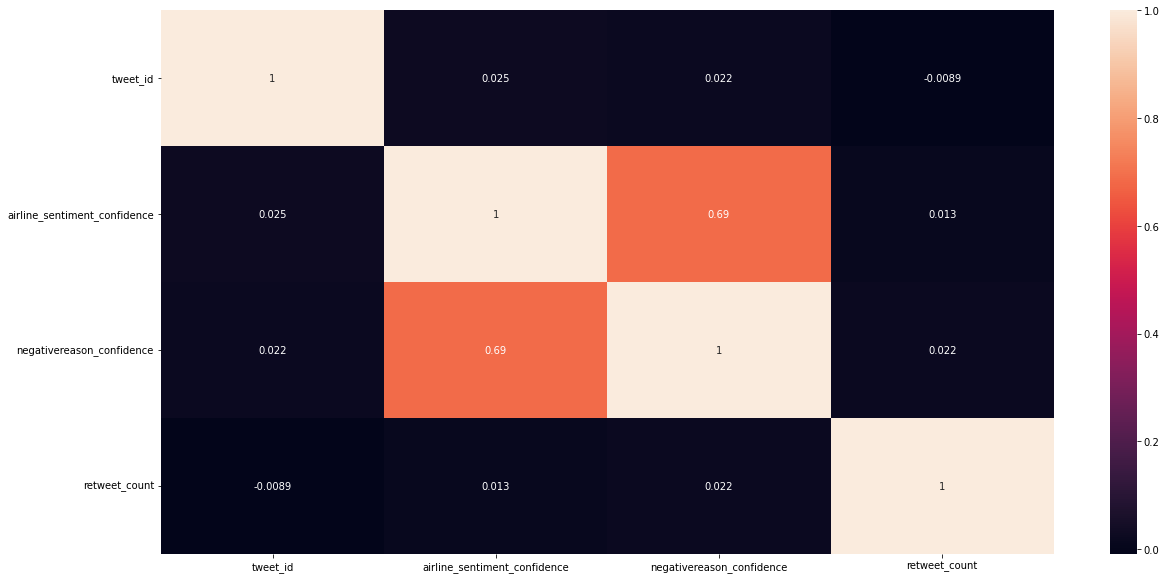

In [51]:
plt.figure(figsize=(20,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

### Genel olarak baktığımızda Heatmap ile elde edilen verilerin basit olduğu düşünülebilir. Oysaki bu veriler sayesinde internet kullanıcılarının en çok tercih ettiği alanlar belirlenir. Böylece web sayfasının kalitesi olup olmadığı, ne kadar dikkat çekici olduğu ve iyileştirilmesi gerek alanların nereler olduğu anlaşılır.

### Böylece gerekli çalışmaların yapılması ile sayfaya gelen ziyaretçilerin müşteriye dönüşümü sağlanarak firmanın çok daha verimli faaliyetler içerisinde olması amaçlanır. Örneğin ziyaretçilerin en çok yoğunlaştığı alanlara reklamlar yerleştirilerek, bu kampanyalara daha çok tıklanılması ve daha geniş bir kitleye ulaşılması sağlanır.

# Word Cloud oluşturma

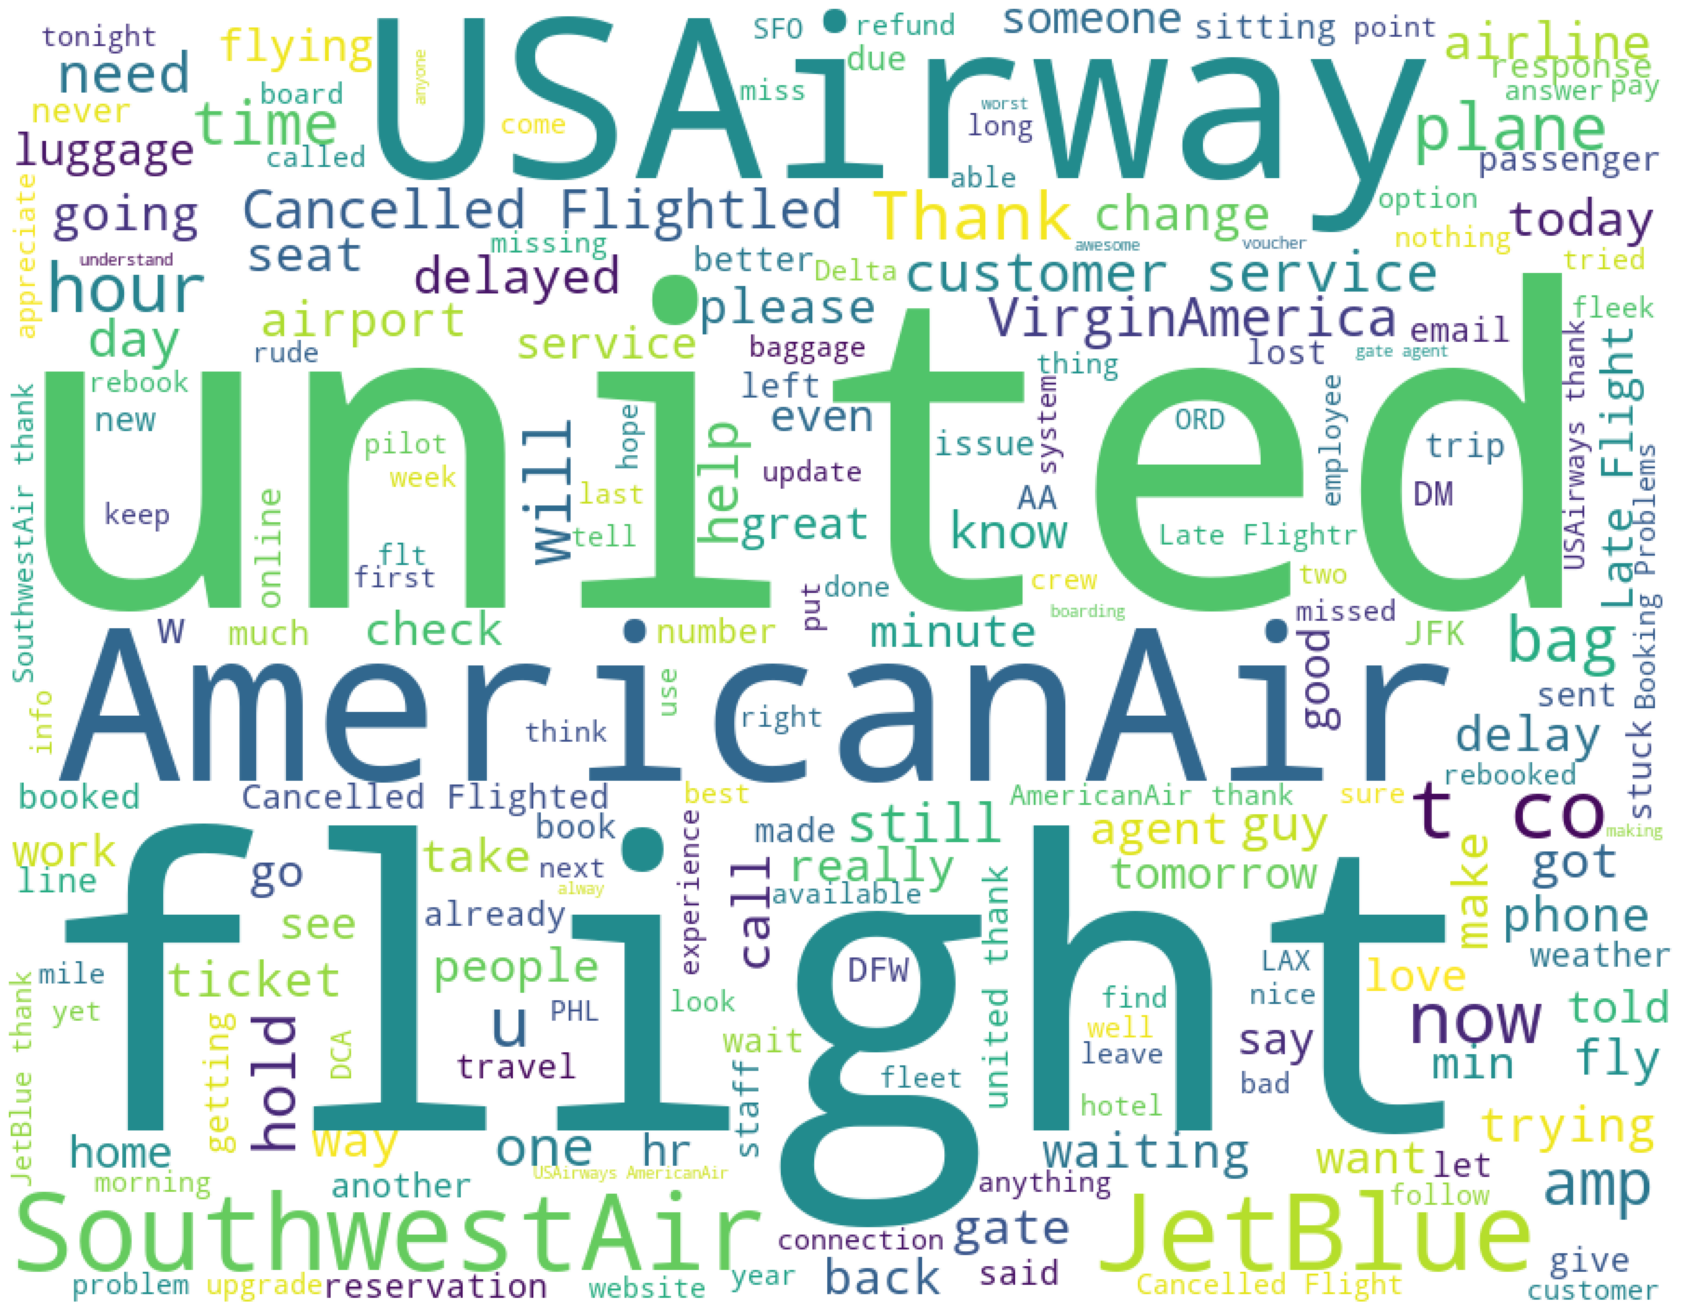

In [52]:
wordcloud=WordCloud(background_color="white",width=900,height=700)
text_cloud=wordcloud.generate(" ".join(data["text"]))
plt.figure(figsize=(30,30))
plt.imshow(text_cloud)
plt.axis("off")
plt.show()

## Accuracy score graph with val_accuracy plot

## Accuracy, anlaşılması ve yorumlanması en basit ölçütlerden birisidir. Makine öğrenmesi sınıflandırma algoritmalarının testlerinde sıklıkla kullanılır. Accuracy skoru aşağıdaki gibi hesaplanır. Accuracy skoru 0 ve 1 arasında olup 1'e yaklaşan skorlarda model başarılı kabul edilir.

### Validation bölümü train veri seti içinden seçilir. Train veri seti üzerinde doğru model seçimi yapılarak algoritma belirlenir. Validation bölümünde ise uygulanan model iyileştirilmeye çalışılır. Bunun için hiper parametrik (hyperparameter tuning) uygulamalar denenerek en optimum katsayılar/ağırlıklar bulunmaya çalışılır. Özellikle çok büyük veri setleri üzerinde sürekli Train datası üzerinden çalışılamayacağı için küçük bir bölüm alınarak validation olarak tanımlanır.

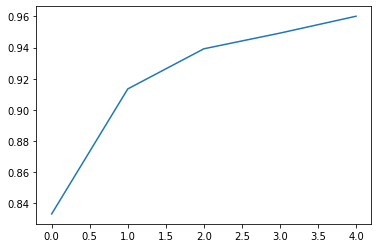

In [53]:
plt.plot(history.history["accuracy"],label="acc")

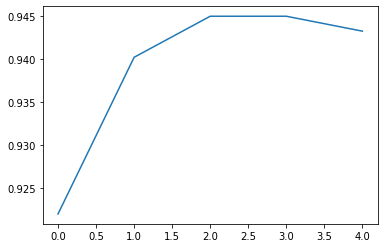

In [66]:
plt.plot(history.history["val_accuracy"],label="vall_acc")

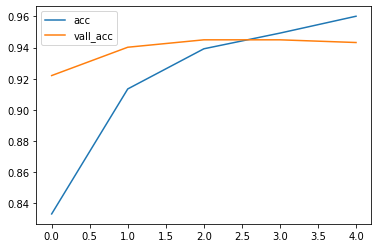

<Figure size 432x288 with 0 Axes>

In [67]:
plt.plot(history.history["accuracy"],label="acc")
plt.plot(history.history["val_accuracy"],label="vall_acc")
plt.legend()
plt.show()
plt.savefig("Accuracy plot.png")

## Loss and Vall_loss

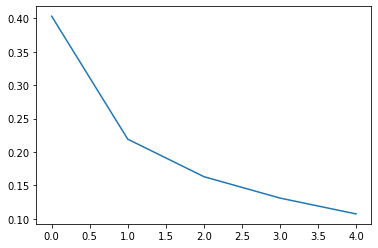

In [68]:
plt.plot(history.history["loss"],label="loss")

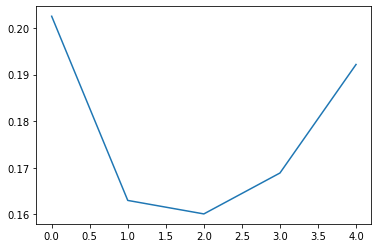

In [69]:
plt.plot(history.history["val_loss"],label="vall_loss")

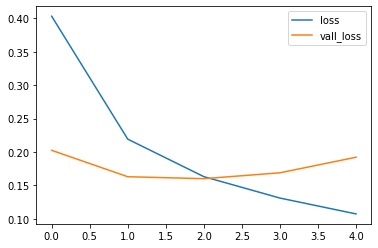

In [70]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="vall_loss")
plt.legend()
plt.show()

## Duygu Analiz Modeli Oluşturma 

### Bir metni girdi olarak alan ve tahmin etiketini çıkaran bir işlev modelini oluşturuyoruz (kısacası bir fonksiyon altında hızlı çalışmasını sağlıyoruz)

In [71]:
def predict_sentiment(text):
    tw=tokenizer.texts_to_sequences([text])
    tw=pad_sequences(tw,maxlen=200)
    prediction=int(model.predict(tw).round().item())
    print("Predict Label:",sentiment_label[1][prediction])

In [72]:
test_sentences=" I enjoyed my journey on this flight "
predict_sentiment(test_sentences)

1/1 [==============================] - 0s 183ms/step
Predict Label: positive


### "Bu uçuşta yolculuğumdan keyif aldım"

In [73]:
test_sentences2="You buy a ticket from THY. At least they give toast at THY. They also cut it up in Anatolia. They just distribute a little water. We knew Anatolia of THY, but they act as a subsidiary of SunExpress. thy is far from its old quality."
predict_sentiment(test_sentences2)

1/1 [==============================] - 0s 22ms/step
Predict Label: negative


### "THY dan bilet alıyorsun.Sunexpress' in hurdaya çıkmış eskimiş koltuklarda baş koyacak yerleri ellenemeyecek kadar kirlenmiş uçakları ile yolculuk yaptirmaktalar. THY da en azından tost vermekteler.Anadolu da onu da kesmişler.sadece küçük bir su dagitmaktalar. Anadoluyu THY nin biliyorduk fakat SunExpress in yan firması gibi davranmaktalar.thy eski kalitesinden çok uzak".

In [74]:
test_sentences3="Qatar Airways have promised me a refund but have failed to make the refund. They refuse to answer emails and hang up when I phone them"
predict_sentiment(test_sentences3)

1/1 [==============================] - 0s 21ms/step
Predict Label: negative


## "Qatar Airways bana bir geri ödeme sözü verdi, ancak geri ödemeyi yapmadı. E-postalara cevap vermeyi reddediyorlar ve onları aradığımda telefonu kapatıyorlar"

In [104]:
test_sentences4="At the Istanbul Airport THY counter, Aylin Karadağlı provided the service we wanted for a long time with her calm and polite demeanor, and we would also like to thank you🙏🏻"
predict_sentiment(test_sentences4)

1/1 [==============================] - 0s 21ms/step
Predict Label: positive


## "İstanbul Havalimani THY kontuarında Aylin Karadağlı, görevine hakim, sakin ve kibar tavrıyla uzun zamandır almak istediğimiz hizmeti sağladı, ayrıca teşekkürlerimizi sunarız🙏🏻"